# DEEP learning 

## Réseaux de neurones récurent 

In [ ]:

import  numpy  as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
df = pd.read_csv("./dataset/AirPassengers.csv")

In [ ]:
print(" shape : \n ",df.shape )
print(" head : \n ",df.head())

In [ ]:

sns.lineplot(x='Month', y='#Passengers', data=df, color="red")


In [ ]:

# Charger le dataset
data = df.copy()

# Convertir la colonne "Month" en datetime
data['Month'] = pd.to_datetime(data['Month'])

# Calculer la moyenne mobile sur une fenêtre de 3 mois
data['Passengers_sma'] = data['#Passengers'].rolling(window=3).mean()

# Tracer la courbe lissée
sns.lineplot(x='Month', y='Passengers_sma', data=data)


In [ ]:
df= df[["#Passengers"]].values
sc = MinMaxScaler( feature_range=[0,1] )
df=sc.fit_transform(df)


In [ ]:
x_data = []
y_data = []
loop_back = 1
for i in range(len(df)-1):
    x_data.append(df[i:(i+loop_back), 0])
    y_data.append(df[i+loop_back, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
print("x_data :\n ", x_data)

print("y_data :\n ", y_data)


In [ ]:
x_data.shape

In [ ]:
#  Reshape
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))
x_data.shape
x_data


In [ ]:
train_size = int(len(x_data)*0.7)
test_size = len(x_data)-train_size
x_train = x_data[0:train_size, :]
x_test = x_data[train_size: len(x_data), :]
y_train = y_data[0:train_size]
y_test = y_data[train_size:len(x_data)]


In [ ]:

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)


# Creation du model 

In [ ]:
model = Sequential()

# entrée
model.add(LSTM(units=50, return_sequences=True,
          input_shape=(x_train.shape[1], 1)))

# couche intermédiaire
model.add(LSTM(units=50, return_sequences=True))

model.add(LSTM(units=50))

# dortie
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()


In [612]:
model.fit(x_train, y_train, epochs=2000, batch_size=x_train.shape[0] )


1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 799/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 800/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 801/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 802/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 803/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 804/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 805/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 806/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 807/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 808/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 809/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 810/2000
1/1 [=======================

In [613]:
model.evaluate(x_test , y_test)

2/2 [==============================] - 1s 3ms/step - loss: 0.0102


0.010193726979196072

2/2 [==============================] - 0s 2ms/step


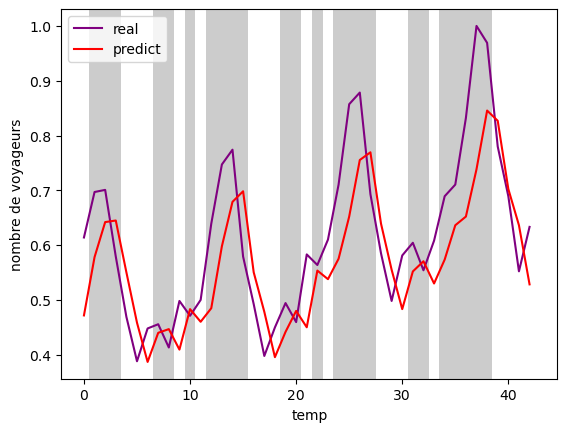

In [626]:

# Définition des couleurs à utiliser
green = 'black'
gray = 'white'

# Prédiction du modèle
y_predict = model.predict(x_test)

# Création du graphique
fig, ax = plt.subplots()

# Trace la courbe réelle en violet
ax.plot(y_test, color='purple', label='real')

# Trace la courbe prédite en rouge
ax.plot(y_predict, color='red', label='predict')

# Ajout des labels et de la légende
ax.set_xlabel("temp")
ax.set_ylabel("nombre de voyageurs")
ax.legend()

# Colorie le fond du graphique en vert clair si la courbe rouge est en hausse et en gris clair sinon
for i in range(1, len(y_predict)):
    if y_predict[i] > y_predict[i-1]:
        ax.axvspan(i-0.5, i+0.5, facecolor=green, alpha=0.2)
    else:
        ax.axvspan(i-0.5, i+0.5, facecolor=gray, alpha=0.2)

# Affiche le graphique